In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import re

In [2]:
data = pd.read_csv(r"D:\Data\Deep_Learning\Image_Caption\captions.txt")

In [3]:
data.head(10)

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
5,1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting
6,1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with...
7,1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots a...
8,1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each o...
9,1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .


In [4]:
data.shape

(40455, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   image    40455 non-null  object
 1   caption  40455 non-null  object
dtypes: object(2)
memory usage: 632.2+ KB


In [6]:
# unique images are 8091
# for each image there are 5captions.
8091*5 

40455

In [7]:
data.image.value_counts()

1000268201_693b08cb0e.jpg    5
3388094307_5a83be64a5.jpg    5
3393394134_0caac47e1c.jpg    5
3393343330_b13df4d8ec.jpg    5
3393152604_27bd1037f2.jpg    5
                            ..
2699733386_c346c87ea6.jpg    5
2699426519_228719b1db.jpg    5
2699342860_5288e203ea.jpg    5
2699125097_c6801d80ed.jpg    5
997722733_0cb5439472.jpg     5
Name: image, Length: 8091, dtype: int64

In [8]:
len(data.image.unique())

8091

In [9]:
obj=data.groupby(data.image)

In [10]:
obj.groups

{'1000268201_693b08cb0e.jpg': [0, 1, 2, 3, 4], '1001773457_577c3a7d70.jpg': [5, 6, 7, 8, 9], '1002674143_1b742ab4b8.jpg': [10, 11, 12, 13, 14], '1003163366_44323f5815.jpg': [15, 16, 17, 18, 19], '1007129816_e794419615.jpg': [20, 21, 22, 23, 24], '1007320043_627395c3d8.jpg': [25, 26, 27, 28, 29], '1009434119_febe49276a.jpg': [30, 31, 32, 33, 34], '1012212859_01547e3f17.jpg': [35, 36, 37, 38, 39], '1015118661_980735411b.jpg': [40, 41, 42, 43, 44], '1015584366_dfcec3c85a.jpg': [45, 46, 47, 48, 49], '101654506_8eb26cfb60.jpg': [50, 51, 52, 53, 54], '101669240_b2d3e7f17b.jpg': [55, 56, 57, 58, 59], '1016887272_03199f49c4.jpg': [60, 61, 62, 63, 64], '1019077836_6fc9b15408.jpg': [65, 66, 67, 68, 69], '1019604187_d087bf9a5f.jpg': [70, 71, 72, 73, 74], '1020651753_06077ec457.jpg': [75, 76, 77, 78, 79], '1022454332_6af2c1449a.jpg': [80, 81, 82, 83, 84], '1022454428_b6b660a67b.jpg': [85, 86, 87, 88, 89], '1022975728_75515238d8.jpg': [90, 91, 92, 93, 94], '102351840_323e3de834.jpg': [95, 96, 97, 9

In [11]:
obj.get_group('1000268201_693b08cb0e.jpg')

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [12]:
obj.get_group('1000268201_693b08cb0e.jpg')['caption']

0    A child in a pink dress is climbing up a set o...
1                A girl going into a wooden building .
2     A little girl climbing into a wooden playhouse .
3    A little girl climbing the stairs to her playh...
4    A little girl in a pink dress going into a woo...
Name: caption, dtype: object

In [13]:
obj.groups.keys()

dict_keys(['1000268201_693b08cb0e.jpg', '1001773457_577c3a7d70.jpg', '1002674143_1b742ab4b8.jpg', '1003163366_44323f5815.jpg', '1007129816_e794419615.jpg', '1007320043_627395c3d8.jpg', '1009434119_febe49276a.jpg', '1012212859_01547e3f17.jpg', '1015118661_980735411b.jpg', '1015584366_dfcec3c85a.jpg', '101654506_8eb26cfb60.jpg', '101669240_b2d3e7f17b.jpg', '1016887272_03199f49c4.jpg', '1019077836_6fc9b15408.jpg', '1019604187_d087bf9a5f.jpg', '1020651753_06077ec457.jpg', '1022454332_6af2c1449a.jpg', '1022454428_b6b660a67b.jpg', '1022975728_75515238d8.jpg', '102351840_323e3de834.jpg', '1024138940_f1fefbdce1.jpg', '102455176_5f8ead62d5.jpg', '1026685415_0431cbf574.jpg', '1028205764_7e8df9a2ea.jpg', '1030985833_b0902ea560.jpg', '103106960_e8a41d64f8.jpg', '103195344_5d2dc613a3.jpg', '103205630_682ca7285b.jpg', '1032122270_ea6f0beedb.jpg', '1032460886_4a598ed535.jpg', '1034276567_49bb87c51c.jpg', '104136873_5b5d41be75.jpg', '1042020065_fb3d3ba5ba.jpg', '1042590306_95dea0916c.jpg', '1045521051

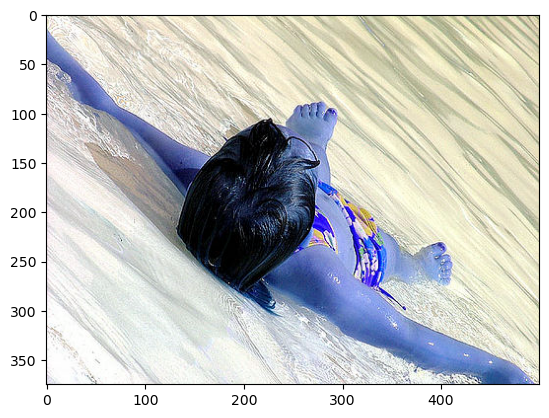

In [14]:
img = cv2.imread(r"D:\Data\Deep_Learning\Image_Caption\Images\667626_18933d713e.jpg")
plt.imshow(img);

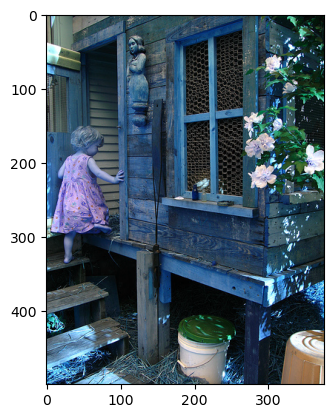

0    A child in a pink dress is climbing up a set o...
1                A girl going into a wooden building .
2     A little girl climbing into a wooden playhouse .
3    A little girl climbing the stairs to her playh...
4    A little girl in a pink dress going into a woo...
Name: caption, dtype: object


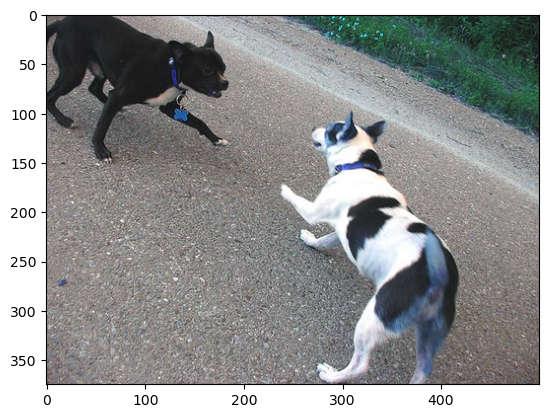

5           A black dog and a spotted dog are fighting
6    A black dog and a tri-colored dog playing with...
7    A black dog and a white dog with brown spots a...
8    Two dogs of different breeds looking at each o...
9      Two dogs on pavement moving toward each other .
Name: caption, dtype: object


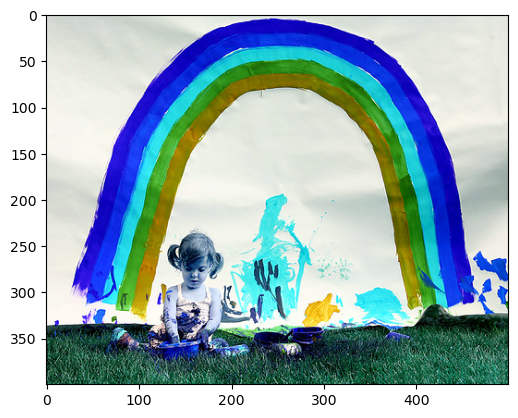

10    A little girl covered in paint sits in front o...
11    A little girl is sitting in front of a large p...
12    A small girl in the grass plays with fingerpai...
13    There is a girl with pigtails sitting in front...
14    Young girl with pigtails painting outside in t...
Name: caption, dtype: object


In [15]:
count=0
for y in obj.groups.keys():
    img = cv2.imread(r"D:\Data\Deep_Learning\Image_Caption\Images\{}".format(y))
    plt.imshow(img)
    plt.show()
    print(obj.get_group(y)['caption'])
    count+=1
    if count==3:
        break

## *Text Preprocessing*

In [16]:
data[['caption']]

,caption
0,A child in a pink dress is climbing up a set o...
1,A girl going into a wooden building .
2,A little girl climbing into a wooden playhouse .
3,A little girl climbing the stairs to her playh...
4,A little girl in a pink dress going into a woo...
...,...
40450,A man in a pink shirt climbs a rock face
40451,A man is rock climbing high in the air .
40452,A person in a red shirt climbing up a rock fac...
40453,A rock climber in a red shirt .


In [17]:
data[['caption']].applymap(len)

,caption
0,72
1,37
2,48
3,52
4,57
...,...
40450,40
40451,40
40452,75
40453,31


In [18]:
data_copy = data.copy()

In [19]:
# coverting every to lower case
# Removing the sepcial characters
data_copy[['caption']] = data_copy[['caption']].applymap(lambda x:x.lower()).applymap(lambda x:re.sub("[^a-z ]","",x))

In [20]:
data_copy[['caption']]

,caption
0,a child in a pink dress is climbing up a set o...
1,a girl going into a wooden building
2,a little girl climbing into a wooden playhouse
3,a little girl climbing the stairs to her playh...
4,a little girl in a pink dress going into a woo...
...,...
40450,a man in a pink shirt climbs a rock face
40451,a man is rock climbing high in the air
40452,a person in a red shirt climbing up a rock fac...
40453,a rock climber in a red shirt


In [21]:
def removing(x):
    split = x.split()
    string = []
    for word in split:
        if len(word)>1:
            string.append(word)
    new_words = ' '.join(string)
    return new_words

In [22]:
removing("a child in a pink dress is climbing up a set")

'child in pink dress is climbing up set'

In [23]:
data_copy[['caption']] = data_copy[['caption']].applymap(removing)

In [24]:
data_copy

,image,caption
0,1000268201_693b08cb0e.jpg,child in pink dress is climbing up set of stai...
1,1000268201_693b08cb0e.jpg,girl going into wooden building
2,1000268201_693b08cb0e.jpg,little girl climbing into wooden playhouse
3,1000268201_693b08cb0e.jpg,little girl climbing the stairs to her playhouse
4,1000268201_693b08cb0e.jpg,little girl in pink dress going into wooden cabin
...,...,...
40450,997722733_0cb5439472.jpg,man in pink shirt climbs rock face
40451,997722733_0cb5439472.jpg,man is rock climbing high in the air
40452,997722733_0cb5439472.jpg,person in red shirt climbing up rock face cove...
40453,997722733_0cb5439472.jpg,rock climber in red shirt


In [25]:
data_copy[['caption']] = data_copy[['caption']].applymap(lambda x:'startseq '+x+' endseq')

In [26]:
data_copy[['caption']]

,caption
0,startseq child in pink dress is climbing up se...
1,startseq girl going into wooden building endseq
2,startseq little girl climbing into wooden play...
3,startseq little girl climbing the stairs to he...
4,startseq little girl in pink dress going into ...
...,...
40450,startseq man in pink shirt climbs rock face en...
40451,startseq man is rock climbing high in the air ...
40452,startseq person in red shirt climbing up rock ...
40453,startseq rock climber in red shirt endseq


In [27]:
data_copy

,image,caption
0,1000268201_693b08cb0e.jpg,startseq child in pink dress is climbing up se...
1,1000268201_693b08cb0e.jpg,startseq girl going into wooden building endseq
2,1000268201_693b08cb0e.jpg,startseq little girl climbing into wooden play...
3,1000268201_693b08cb0e.jpg,startseq little girl climbing the stairs to he...
4,1000268201_693b08cb0e.jpg,startseq little girl in pink dress going into ...
...,...,...
40450,997722733_0cb5439472.jpg,startseq man in pink shirt climbs rock face en...
40451,997722733_0cb5439472.jpg,startseq man is rock climbing high in the air ...
40452,997722733_0cb5439472.jpg,startseq person in red shirt climbing up rock ...
40453,997722733_0cb5439472.jpg,startseq rock climber in red shirt endseq


In [28]:
import keras
from keras.applications import VGG19
from keras.models import Sequential
from keras import Model # Helps in doing the transfer learning.

In [29]:
architecture=VGG19(weights="imagenet", input_shape=(224,224,3))

In [30]:
architecture.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [31]:
architecture.layers

In [32]:
architecture.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [33]:
model = Model(architecture.input, architecture.layers[-4].output)

In [34]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [35]:
data_copy["image"]

0        1000268201_693b08cb0e.jpg
1        1000268201_693b08cb0e.jpg
2        1000268201_693b08cb0e.jpg
3        1000268201_693b08cb0e.jpg
4        1000268201_693b08cb0e.jpg
                   ...            
40450     997722733_0cb5439472.jpg
40451     997722733_0cb5439472.jpg
40452     997722733_0cb5439472.jpg
40453     997722733_0cb5439472.jpg
40454     997722733_0cb5439472.jpg
Name: image, Length: 40455, dtype: object

In [36]:
len(data_copy["image"].unique())

8091

In [ ]:
final_im={}
for y in data_copy["image"].unique():
    img=cv2.imread(r"D:\Data\Deep_Learning\Image_Caption\Images\{}".format(y))
    img=cv2.resize(img,(224,224))
    img=img/255.0
    img=img.reshape((1,224,224,3))
    output = model.predict(img)
    final=output.reshape((-1))
    final_im.update({y:final})

1/1 [==============================] - 0s 310ms/step


In [37]:
import pickle
file = open(r"C:\Users\yadag\Downloads\final.pkl",'rb')
obj = pickle.load(file)

In [38]:
len(obj)

8091

In [39]:
obj.keys()

dict_keys(['1000268201_693b08cb0e.jpg', '1001773457_577c3a7d70.jpg', '1002674143_1b742ab4b8.jpg', '1003163366_44323f5815.jpg', '1007129816_e794419615.jpg', '1007320043_627395c3d8.jpg', '1009434119_febe49276a.jpg', '1012212859_01547e3f17.jpg', '1015118661_980735411b.jpg', '1015584366_dfcec3c85a.jpg', '101654506_8eb26cfb60.jpg', '101669240_b2d3e7f17b.jpg', '1016887272_03199f49c4.jpg', '1019077836_6fc9b15408.jpg', '1019604187_d087bf9a5f.jpg', '1020651753_06077ec457.jpg', '1022454332_6af2c1449a.jpg', '1022454428_b6b660a67b.jpg', '1022975728_75515238d8.jpg', '102351840_323e3de834.jpg', '1024138940_f1fefbdce1.jpg', '102455176_5f8ead62d5.jpg', '1026685415_0431cbf574.jpg', '1028205764_7e8df9a2ea.jpg', '1030985833_b0902ea560.jpg', '103106960_e8a41d64f8.jpg', '103195344_5d2dc613a3.jpg', '103205630_682ca7285b.jpg', '1032122270_ea6f0beedb.jpg', '1032460886_4a598ed535.jpg', '1034276567_49bb87c51c.jpg', '104136873_5b5d41be75.jpg', '1042020065_fb3d3ba5ba.jpg', '1042590306_95dea0916c.jpg', '1045521051

In [40]:
data_copy

,image,caption
0,1000268201_693b08cb0e.jpg,startseq child in pink dress is climbing up se...
1,1000268201_693b08cb0e.jpg,startseq girl going into wooden building endseq
2,1000268201_693b08cb0e.jpg,startseq little girl climbing into wooden play...
3,1000268201_693b08cb0e.jpg,startseq little girl climbing the stairs to he...
4,1000268201_693b08cb0e.jpg,startseq little girl in pink dress going into ...
...,...,...
40450,997722733_0cb5439472.jpg,startseq man in pink shirt climbs rock face en...
40451,997722733_0cb5439472.jpg,startseq man is rock climbing high in the air ...
40452,997722733_0cb5439472.jpg,startseq person in red shirt climbing up rock ...
40453,997722733_0cb5439472.jpg,startseq rock climber in red shirt endseq


In [41]:
for y in data_copy['caption'].values[0:1]:
    print(y.split())

['startseq', 'child', 'in', 'pink', 'dress', 'is', 'climbing', 'up', 'set', 'of', 'stairs', 'in', 'an', 'entry', 'way', 'endseq']


In [42]:
l=set()
for y in data_copy['caption'].values:
    l.update(y.split())

In [43]:
len(l) # This the unique vocabulary size of the entire data.

8767

In [44]:
data_copy[['caption']].applymap(lambda x:len(x.split())).max()

caption    34
dtype: int64

In [45]:
word_index={}
for key,word in enumerate(l,start=1):
    word_index.update({word:key})

In [46]:
word_index

{'ipods': 1,
 'peeing': 2,
 'canvas': 3,
 'bobsled': 4,
 'mainly': 5,
 'nylon': 6,
 'protesting': 7,
 'budweiser': 8,
 'unner': 9,
 'ot': 10,
 'playtoy': 11,
 'clothed': 12,
 'waterhole': 13,
 'anticipates': 14,
 'set': 15,
 'redheaded': 16,
 'cooks': 17,
 'sleeve': 18,
 'artist': 19,
 'stylish': 20,
 'tread': 21,
 'shadowdappled': 22,
 'using': 23,
 'weirmeiner': 24,
 'newly': 25,
 'numerous': 26,
 'magicians': 27,
 'helps': 28,
 'kit': 29,
 'accelerates': 30,
 'brake': 31,
 'flume': 32,
 'maple': 33,
 'disturbed': 34,
 'backstrokes': 35,
 'speaker': 36,
 'ilks': 37,
 'ceremony': 38,
 'defecating': 39,
 'djs': 40,
 'fire': 41,
 'pavement': 42,
 'mustard': 43,
 'swim': 44,
 'dense': 45,
 'stirred': 46,
 'powered': 47,
 'batting': 48,
 'treats': 49,
 'woven': 50,
 'goggles': 51,
 'stunning': 52,
 'brunette': 53,
 'poling': 54,
 'flapping': 55,
 'glovedhand': 56,
 'loop': 57,
 'scalling': 58,
 'falls': 59,
 'persons': 60,
 'shallows': 61,
 'wrinkled': 62,
 'does': 63,
 'mean': 64,
 'scra

In [47]:
data_copy[['caption']].shape

(40455, 1)

In [48]:
sentence = data_copy[['caption']].iloc[0].values[0].split()

In [49]:
sentence

['startseq',
 'child',
 'in',
 'pink',
 'dress',
 'is',
 'climbing',
 'up',
 'set',
 'of',
 'stairs',
 'in',
 'an',
 'entry',
 'way',
 'endseq']

In [50]:
len(sentence)

16

In [51]:
obj[data_copy[['image']].iloc[0].values[0]]

array([0.32672498, 0.        , 0.        , ..., 0.        , 0.86719674,
       0.        ], dtype=float32)

In [52]:
from keras.utils import pad_sequences, to_categorical

In [54]:
image_vector=[]
text_vector=[]
finallabel=[]

for index in range(0,2500):
    sentence = data_copy[['caption']].iloc[index].values[0].split()
    for word in range(1,len(sentence)):
        image_vector.append(obj[data_copy[['image']].iloc[index].values[0]])
        
        x1=sentence[0:word]
        x2=sentence[word]
        
        t1=[]
        for q in x1:
            t1.append(word_index[q])
        text_vector.append(pad_sequences([t1], maxlen=34, padding='post')[0])
        label=word_index[x2]
        finallabel.append(to_categorical([label], num_classes=8768)[0])

In [55]:
len(image_vector)

26085

In [56]:
text_vector

[array([5426,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0]),
 array([5426, 1942,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0]),
 array([5426, 1942, 3621,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0]),
 array([5426, 1942, 3621, 2697,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0]),
 array([5426, 1942, 3621, 2697, 7293,    0,    0

In [57]:
finallabel

[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0.,

In [58]:
[[np.array(image_vector), np.array(text_vector)], np.array(finallabel)]

[[array([[0.32672498, 0.        , 0.        , ..., 0.        , 0.86719674,
          0.        ],
         [0.32672498, 0.        , 0.        , ..., 0.        , 0.86719674,
          0.        ],
         [0.32672498, 0.        , 0.        , ..., 0.        , 0.86719674,
          0.        ],
         ...,
         [0.32471257, 0.        , 0.04752669, ..., 0.        , 1.0203394 ,
          0.        ],
         [0.32471257, 0.        , 0.04752669, ..., 0.        , 1.0203394 ,
          0.        ],
         [0.32471257, 0.        , 0.04752669, ..., 0.        , 1.0203394 ,
          0.        ]], dtype=float32),
  array([[5426,    0,    0, ...,    0,    0,    0],
         [5426, 1942,    0, ...,    0,    0,    0],
         [5426, 1942, 3621, ...,    0,    0,    0],
         ...,
         [5426, 5760, 8173, ...,    0,    0,    0],
         [5426, 5760, 8173, ...,    0,    0,    0],
         [5426, 5760, 8173, ...,    0,    0,    0]])],
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 

In [59]:
from keras import Model
from keras.layers import Dense,Embedding,LSTM,add,Input

In [60]:
input11=Input(shape=(25088,))
o3=Dense(256, activation='relu')(input11)

In [61]:
input1 = Input(shape=(34,))
output1=Embedding(input_dim=8768, output_dim=40)(input1)
o2=LSTM(256)(output1)

In [62]:
o4=add([o3,o2])
final=Dense(8768, activation='softmax')(o4)

In [63]:
model1=Model(inputs=[input11,input1], outputs=[final])

In [64]:
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 34)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 25088)]      0           []                               
                                                                                                  
 embedding (Embedding)          (None, 34, 40)       350720      ['input_3[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 256)          6422784     ['input_2[0][0]']                
                                                                                            

In [65]:
model1.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [66]:
model1.fit([np.array(image_vector), np.array(text_vector)], np.array(finallabel))

816/816 [==============================] - 213s 257ms/step - loss: 5.8713 - accuracy: 0.0937


In [67]:
np.array(image_vector).shape

(26085, 25088)

In [68]:
np.array(finalx2).shape

(26085, 34)